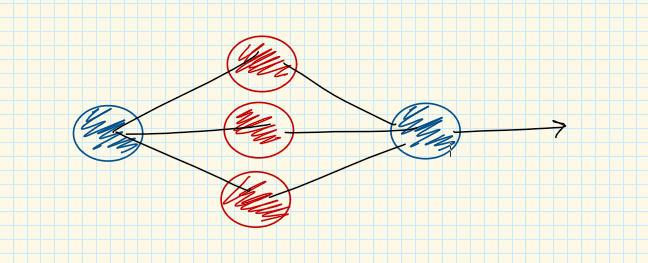

#### Vamos a modelar esta red neuronal con keras

In [14]:
from keras import models
from keras import layers
from keras import optimizers
import numpy as np
import matplotlib.pyplot as plt

In [212]:
#Generamos nuestros datos sintéticos a partir de la función F(x)=3x

def F(x):
    return -x**2

X = 30*np.random.rand(100,1)
Y=np.zeros((100,1))

for i,x in enumerate(X):
    img=F(X[i])
    img=img+np.random.uniform(-0.1,0.1)
    Y[i,:]=img

In [213]:
#Armamos el modelo con estructura 'Sequential'
model=models.Sequential()

#la primer capa recibe un numero solamente, usaremos sigmoide como función de activación para la capa oculta
capa1=layers.Dense(3, activation='sigmoid', input_shape=(1,))
#para la capa de salida usamos Id como activación
capa2=layers.Dense(1)

#armamos el modelo
model.add(capa1)
model.add(capa2)



In [214]:
#Ahora definimos el paso de compilación, con learning rate=0.001
#Función de error cuadrático medio

model.compile(optimizer=optimizers.RMSprop(lr=0.1), loss='mse', metrics=['accuracy'])

In [236]:
#por último traemos los datos de entrenamiento y los procesamos con 'fit()'
def F(x):
    return -3*x

X=30*np.random.rand(100,1)
Y=np.zeros((100,1))

for i,x in enumerate(X):
    img=F(X[i])
    img=img+np.random.uniform(-0.1,0.1)
    Y[i,:]=img
#Ahora procesamos estos datos X y Y

history=model.fit(X,Y,batch_size=1000,epochs=100)


Epoch 1/100
1/1 [==============================] - 0s 4ms/step - loss: 82.2805 - accuracy: 0.0000e+00
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: 106.4723 - accuracy: 0.0000e+00
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 108.9974 - accuracy: 0.0000e+00
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - loss: 116.5633 - accuracy: 0.0000e+00
Epoch 5/100
1/1 [==============================] - 0s 3ms/step - loss: 92.9750 - accuracy: 0.0000e+00
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 104.5359 - accuracy: 0.0000e+00
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 89.5194 - accuracy: 0.0000e+00
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 98.2746 - accuracy: 0.0000e+00
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 86.1508 - accuracy: 0.0000e+00
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 94.539

1/1 [==============================] - 0s 2ms/step - loss: 65.2048 - accuracy: 0.0000e+00
Epoch 81/100
1/1 [==============================] - 0s 2ms/step - loss: 52.0176 - accuracy: 0.0000e+00
Epoch 82/100
1/1 [==============================] - 0s 3ms/step - loss: 64.6308 - accuracy: 0.0000e+00
Epoch 83/100
1/1 [==============================] - 0s 2ms/step - loss: 51.4409 - accuracy: 0.0000e+00
Epoch 84/100
1/1 [==============================] - 0s 2ms/step - loss: 64.0687 - accuracy: 0.0000e+00
Epoch 85/100
1/1 [==============================] - 0s 2ms/step - loss: 50.8799 - accuracy: 0.0000e+00
Epoch 86/100
1/1 [==============================] - 0s 2ms/step - loss: 63.5185 - accuracy: 0.0000e+00
Epoch 87/100
1/1 [==============================] - 0s 2ms/step - loss: 50.3345 - accuracy: 0.0000e+00
Epoch 88/100
1/1 [==============================] - 0s 3ms/step - loss: 62.9800 - accuracy: 0.0000e+00
Epoch 89/100
1/1 [==============================] - 0s 2ms/step - loss: 49.8040 - accu

## Ahora que nuestro modelo está entrenado, veremos cómo luce respecto a la función original

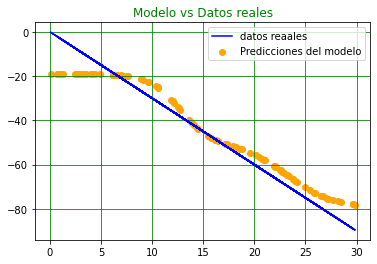

In [237]:
prediccion=model.predict(X)
plt.scatter(X, prediccion,color='orange',label='Predicciones del modelo')
plt.plot(X,-3*X,'b',label='datos reaales')
plt.title('Modelo vs Datos reales',color='green')
plt.grid(color='green')
plt.legend()


## Así cambió la función error durante el entrenamiento

Text(0.5, 1.0, 'Error durante el entrenamiento')

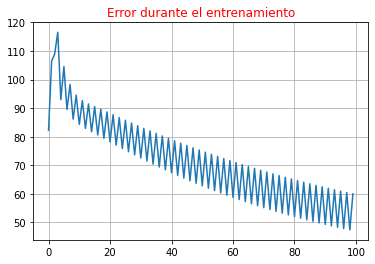

In [238]:
error=history.history['loss']
epochs=np.arange(0,len(error))
plt.plot(epochs,error)
plt.grid()
plt.title('Error durante el entrenamiento',color='red')
